## Reduksi Dimensi

In [1]:
library(stats)

In [2]:
library(base)

In [4]:
install.packages("ggfortify")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’




In [7]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [8]:
install.packages("openxlsx")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#### [Contoh | Langkah 1: Standarisasi Data](https://academy.dqlab.id/main/livecode/89/173/839?pr=0)

In [9]:
library(openxlsx)

df <- read.xlsx("https://storage.googleapis.com/dqlab-dataset/dqlab_pcadata.xlsx", sheet="3varb")

#standarisasi variabel (centering dan scaling)
df <- scale(df, center = TRUE, scale = TRUE)

head(df, 3)

,x1,x2,x3
1,-0.906102243,-0.7416508,-0.3747010
2,0.007307276,0.1550555,-0.4843659
3,-1.125320527,-1.1526412,0.6893456


#### [Contoh | Langkah 2: Menghitung Matrik Korelasi Data](https://academy.dqlab.id/main/livecode/89/173/840?pr=0)

In [10]:
cormat <- cor(df)

cormat

,x1,x2,x3
x1,1.0000000,0.9869242,0.2994195
x2,0.9869242,1.0000000,0.2584419
x3,0.2994195,0.2584419,1.0000000


#### [Contoh | Langkah 3: Menghitung Nilai Eigen dan Vektor Eigen](https://academy.dqlab.id/main/livecode/89/173/841?pr=0)

In [11]:
eig <- eigen(cormat)

eig

eigen() decomposition
$values
[1] 2.12525679 0.86259104 0.01215218

$vectors
          [,1]       [,2]        [,3]
[1,] 0.6704698 -0.2112281  0.71123334
[2,] 0.6640498 -0.2567210 -0.70223374
[3,] 0.3309200  0.9431209 -0.03185768


#### [Contoh | Langkah 4: Memilih Banyaknya Principal Component](https://academy.dqlab.id/main/livecode/89/173/842?pr=0)

[1] 0.708 0.288 0.004

[1] 0.708 0.996 1.000

Standard deviations (1, .., p=3):
[1] 1.4578260 0.9287578 0.1102369

Rotation (n x k) = (3 x 3):
         PC1        PC2         PC3
x1 0.6704698 -0.2112281 -0.71123334
x2 0.6640498 -0.2567210  0.70223374
x3 0.3309200  0.9431209  0.03185768

Importance of components:
                          PC1    PC2     PC3
Standard deviation     1.4578 0.9288 0.11024
Proportion of Variance 0.7084 0.2875 0.00405
Cumulative Proportion  0.7084 0.9960 1.00000

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



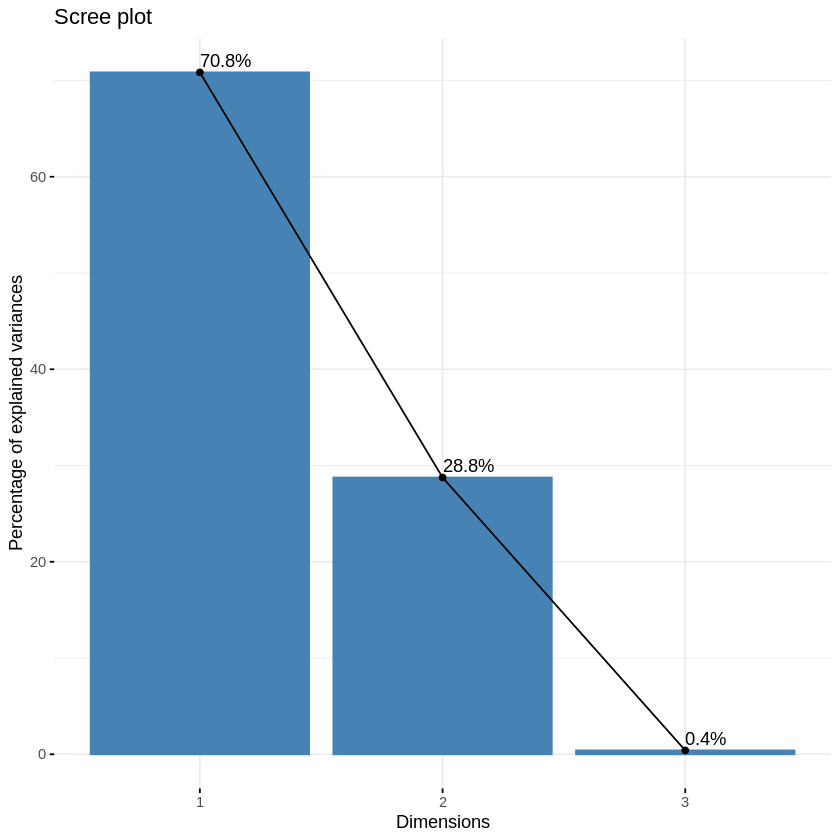

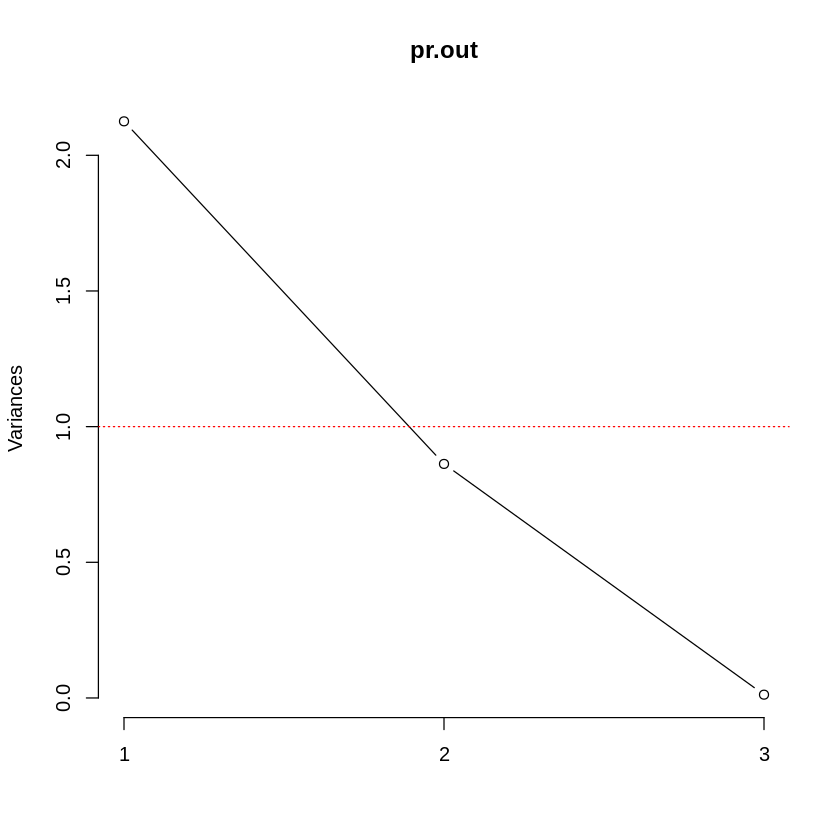

In [12]:
round(eig$values/ncol(df),3)
round(cumsum(eig$values/ncol(df)),3)

pr.out <- prcomp(df, scale. = TRUE, center = TRUE)
pr.out
summary(pr.out)

library(factoextra)

fviz_eig(pr.out, addlabels = TRUE)

screeplot(pr.out, type = "line")
abline(h = 1, lty = 3, col = "red")

#### [Contoh | Langkah 5: Visualisasi dengan Biplot](https://academy.dqlab.id/main/livecode/89/173/843?pr=0)

,PC1,PC2,PC3
x1,0.6704698,-0.2112281,-0.71123334
x2,0.6640498,-0.2567210,0.70223374
x3,0.3309200,0.9431209,0.03185768


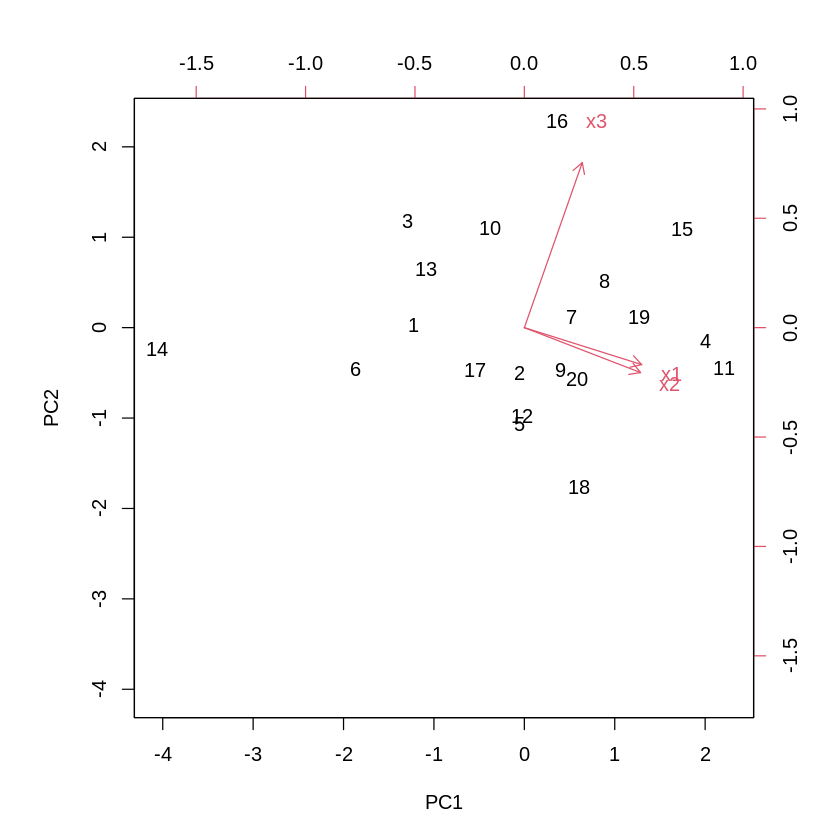

In [13]:
pr.out$rotation

biplot(pr.out, scale = 0)

#### [Contoh | Langkah 6: Menghitung Skor Baru](https://academy.dqlab.id/main/livecode/89/173/844?pr=0)

In [14]:
head(df)

df_new <- df %*% pr.out$rotation
df_new[1:6,1:2]

,x1,x2,x3
1,-0.906102243,-0.7416508,-0.3747010
2,0.007307276,0.1550555,-0.4843659
3,-1.125320527,-1.1526412,0.6893456
4,1.541835268,1.2012128,0.5159564
5,0.153452799,0.2671437,-1.0220701
6,-1.125320527,-1.1526412,-1.0450404


,PC1,PC2
1,-1.22400335,0.02840327
2,-0.05242254,-0.49816513
3,-1.29178635,1.18374272
4,2.00215943,-0.14744625
5,-0.05794123,-1.06493057
6,-1.86572942,-0.45199295


#### [Tugas Praktik](https://academy.dqlab.id/main/livecode/89/173/845?pr=0)

'data.frame':	20 obs. of  3 variables:
 $ x1: num  8.1 10.6 7.5 14.8 11 7.5 11.5 12.2 11.7 9.1 ...
 $ x2: num  10.6 13 9.5 15.8 13.3 9.5 13.4 13.5 13.5 11.3 ...
 $ x3: num  217.7 173.3 648.5 578.3 -44.4 ...


,x1,x2,x3
,<dbl>,<dbl>,<dbl>
1,8.1,10.6,217.7
2,10.6,13.0,173.3
3,7.5,9.5,648.5
4,14.8,15.8,578.3
5,11.0,13.3,-44.4
6,7.5,9.5,-53.7


[1] "sdev"     "rotation" "center"   "scale"    "x"

Standard deviations (1, .., p=3):
[1] 1.4578260 0.9287578 0.1102369

Rotation (n x k) = (3 x 3):
         PC1        PC2         PC3
x1 0.6704698 -0.2112281 -0.71123334
x2 0.6640498 -0.2567210  0.70223374
x3 0.3309200  0.9431209  0.03185768

Importance of components:
                          PC1    PC2     PC3
Standard deviation     1.4578 0.9288 0.11024
Proportion of Variance 0.7084 0.2875 0.00405
Cumulative Proportion  0.7084 0.9960 1.00000

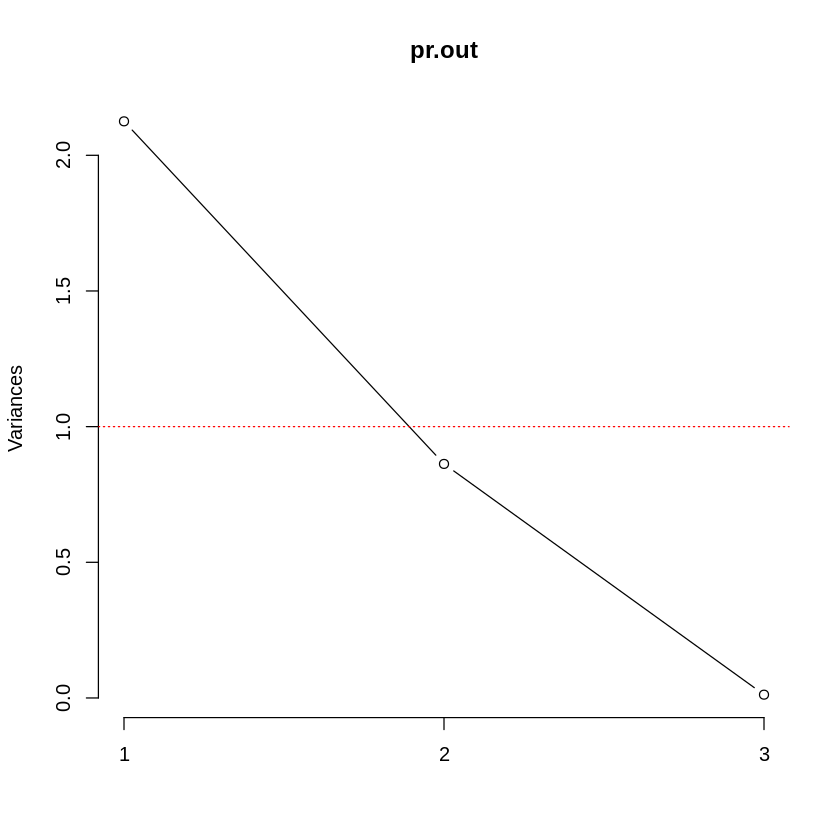

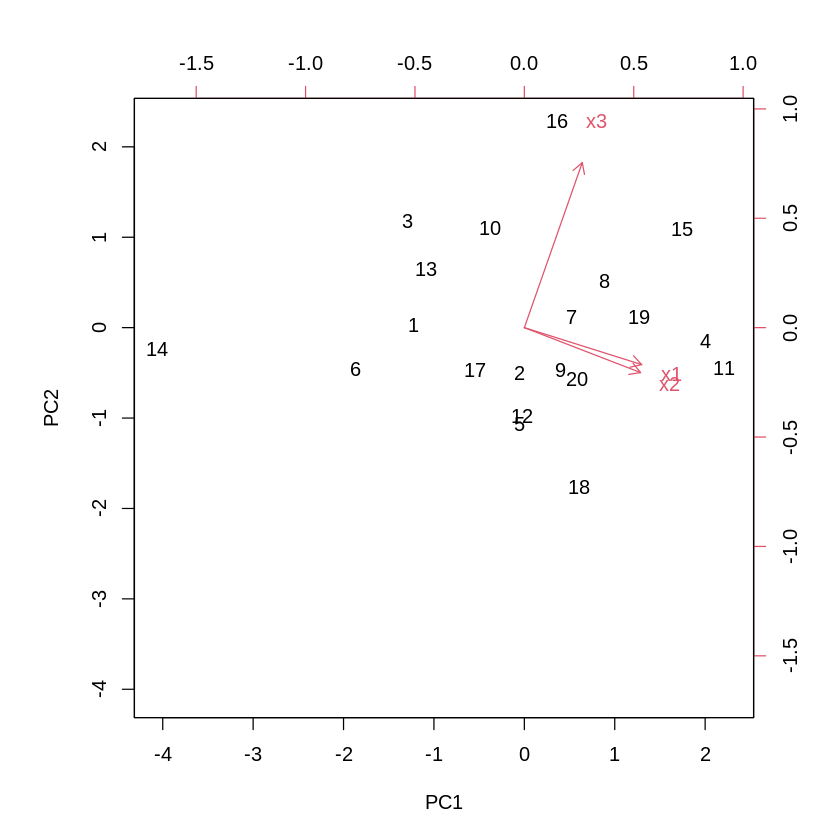

In [15]:
#Baca data pada sheet "3varb" dalam file https://storage.googleapis.com/dqlab-dataset/dqlab_pcadata.xlsx
#dan simpan data dengan nama df_raw
df_raw <- read.xlsx("https://storage.googleapis.com/dqlab-dataset/dqlab_pcadata.xlsx", sheet = "3varb")

#Tampilkan struktur data 
str(df_raw)

#Tampilkan beberapa baris observasi dengan fungsi head()
head(df_raw)

#Lakukan analisa PCA dengan fungsi prcomp() dan
#simpan output ke dalam obyek dengan nama pr.out
pr.out <- prcomp(df_raw, center = TRUE, scale = TRUE, retx = TRUE)

#Tampilkan komponen output fungsi prcomp()
names(pr.out)

#Tampilkan output PCA dengan memanggil obyek pr.out
pr.out

#Tampilkan summary dari output PCA
summary(pr.out)

#Gambarkan Screeplot dengan menggunakan fungsi screeplot()
screeplot(pr.out, type = "line")

#Tambahkan garis horizontal sebagai panduan untuk menggunakan kriteria Kaiser
abline(h = 1, col = "red", lty = 3)

#Gambarkan biplot dengan menggunakan fungsi biplot()
#Gunakan opsi scale = 0 agar panjang vektor sesuai dengan kontribusi variabel.
biplot(pr.out, scale = 0)

## Studi Kasus: 4 Variabel

#### [Tugas Praktik: 4 Variabel](https://academy.dqlab.id/main/livecode/89/174/852?pr=0)

'data.frame':	900 obs. of  6 variables:
 $ contractcode: chr  "AGR-000001" "AGR-000011" "AGR-000030" "AGR-000043" ...
 $ income      : num  295 271 159 210 165 220 70 88 163 100 ...
 $ tenor       : num  48 36 12 12 36 24 36 48 48 36 ...
 $ dependents  : num  5 5 0 3 0 5 3 3 5 6 ...
 $ midoverdue  : num  75.5 75.5 0 53 38 15 38 38 38 38 ...
 $ riskrating  : num  4 4 1 3 2 1 2 2 2 2 ...


,contractcode,income,tenor,dependents,midoverdue,riskrating
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AGR-000001,295,48,5,75.5,4
2,AGR-000011,271,36,5,75.5,4
3,AGR-000030,159,12,0,0.0,1
4,AGR-000043,210,12,3,53.0,3
5,AGR-000049,165,36,0,38.0,2
6,AGR-000063,220,24,5,15.0,1


 contractcode           income          tenor         dependents   
 Length:900         Min.   : 70.0   Min.   :12.00   Min.   :0.000  
 Class :character   1st Qu.:121.0   1st Qu.:12.00   1st Qu.:1.000  
 Mode  :character   Median :162.0   Median :24.00   Median :3.000  
                    Mean   :163.3   Mean   :29.93   Mean   :2.932  
                    3rd Qu.:199.0   3rd Qu.:48.00   3rd Qu.:5.000  
                    Max.   :300.0   Max.   :48.00   Max.   :6.000  
   midoverdue     riskrating   
 Min.   : 0.0   Min.   :1.000  
 1st Qu.:15.0   1st Qu.:1.000  
 Median :53.0   Median :3.000  
 Mean   :48.1   Mean   :2.681  
 3rd Qu.:53.0   3rd Qu.:3.000  
 Max.   :91.0   Max.   :5.000  

,income,tenor,dependents,midoverdue
income,1.00000000,-0.07256604,0.2427909,0.1250535
tenor,-0.07256604,1.00000000,0.0334339,0.2333681
dependents,0.24279088,0.03343390,1.0000000,0.7632659
midoverdue,0.12505348,0.23336810,0.7632659,1.0000000


Standard deviations (1, .., p=4):
[1] 1.3685609 1.0492944 0.9059637 0.4530475

Rotation (n x k) = (4 x 4):
                  PC1        PC2        PC3         PC4
income     -0.2665678  0.6235436 -0.7299486  0.08549929
tenor      -0.1827165 -0.7592266 -0.6015443 -0.16832731
dependents -0.6675878  0.1100498  0.2569754 -0.69005738
midoverdue -0.6707330 -0.1505238  0.1981998  0.69869635

Importance of components:
                          PC1    PC2    PC3     PC4
Standard deviation     1.3686 1.0493 0.9060 0.45305
Proportion of Variance 0.4682 0.2752 0.2052 0.05131
Cumulative Proportion  0.4682 0.7435 0.9487 1.00000

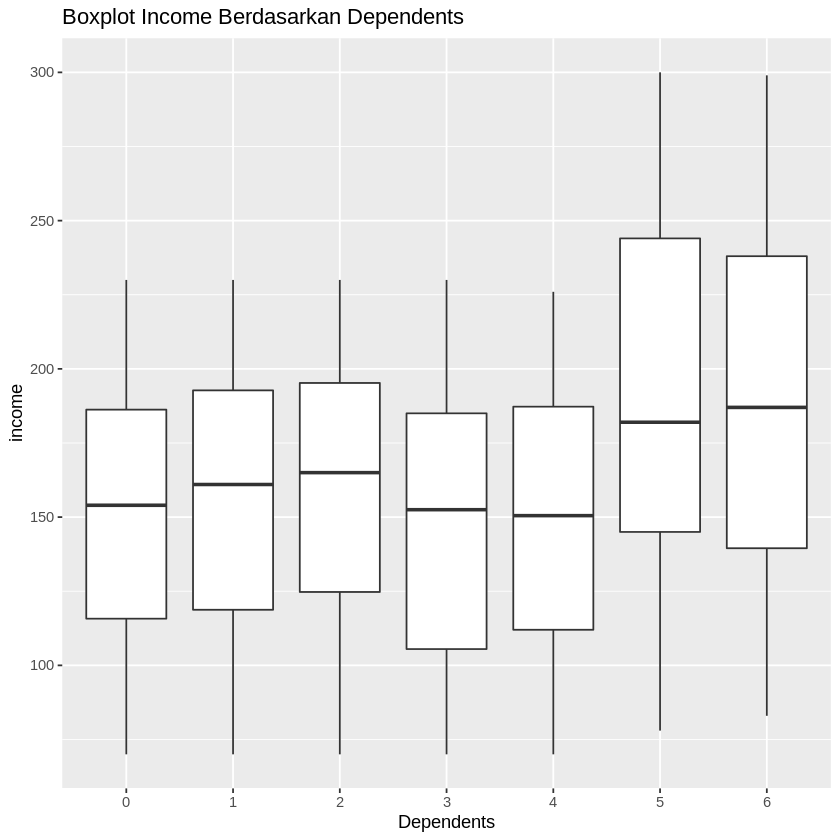

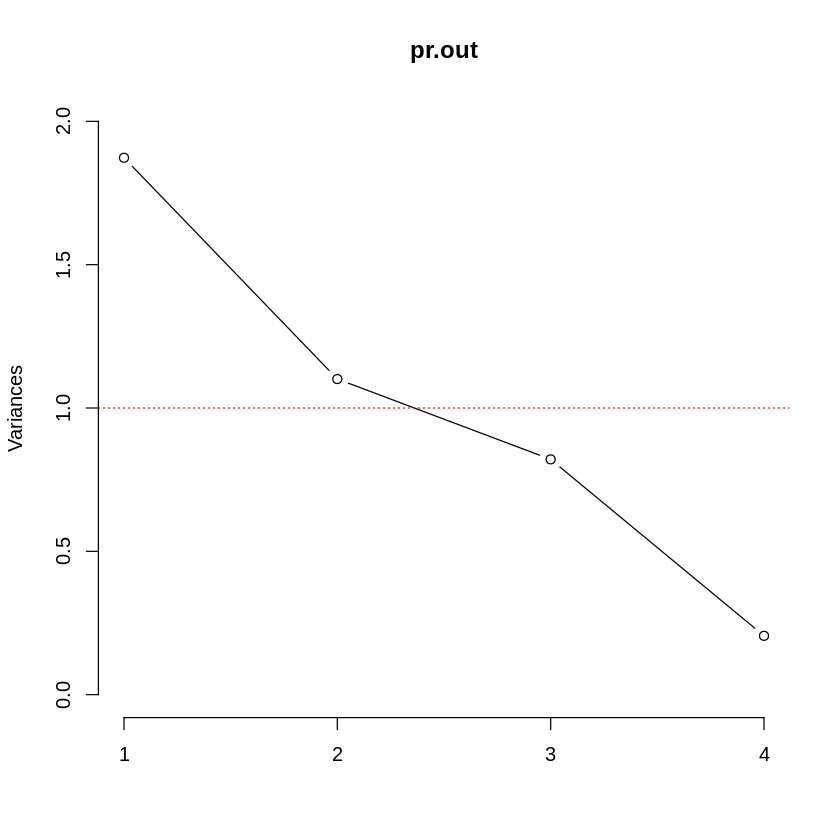

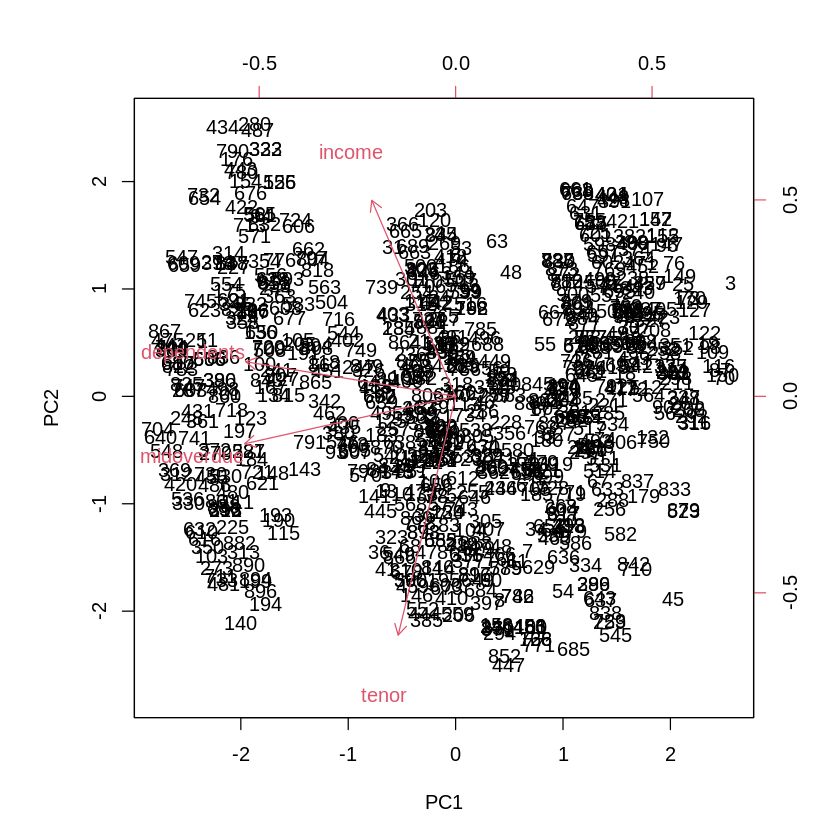

In [16]:
#Baca data pada sheet "csdata" dalam file "https://storage.googleapis.com/dqlab-dataset/dqlab_pcadata.xlsx"
#dan simpan data dengan nama "csdat_raw"
csdat_raw <- read.xlsx("https://storage.googleapis.com/dqlab-dataset/dqlab_pcadata.xlsx", sheet = "csdata")

#Tampilkan struktur data 
str(csdat_raw)

#Tampilkan beberapa baris observasi dengan fungsi head()
head(csdat_raw)

#Tampilkan statistika deskriptif untuk semua variabel dalam data dengan fungsi summary()
summary(csdat_raw)

#Gambarkan distribusi Income berdasarkan Dependents
library(ggplot2)
ggplot(csdat_raw, aes(as.factor(dependents), income)) + 
   geom_boxplot() + xlab("Dependents") + ggtitle("Boxplot Income Berdasarkan Dependents")

#Pisahkan data untuk traning set dan testing set 
#untuk tiap-tiap risk rating
#[5]

#Catat indeks/ nomor baris untuk tiap-tiap risk rating
index1 <- which(csdat_raw$riskrating == 1)
index2 <- which(csdat_raw$riskrating == 2)

#Lakukan pencatatan indeks untuk risk rating berikutnya
index3 <- which(csdat_raw$riskrating == 3)
index4 <- which(csdat_raw$riskrating == 4)
index5 <- which(csdat_raw$riskrating == 5)

#80% data akan digunakan sebagai traning set.
#Ulangi langkah sampai dengan index5
ntrain1 <- round(0.8 * length(index1))
ntrain2 <- round(0.8 * length(index2))
ntrain3 <- round(0.8 * length(index3))
ntrain4 <- round(0.8 * length(index4))
ntrain5 <- round(0.8 * length(index5))

#set seed agar sampling ini bisa direproduksi
set.seed(100)

#sampling data masing-masing rating untuk training set
#Ulangi langkah sampai dengan train5_index
train1_index <- sample(index1, ntrain1)
train2_index <- sample(index2, ntrain2)
train3_index <- sample(index3, ntrain3)
train4_index <- sample(index4, ntrain4)
train5_index <- sample(index5, ntrain5)

#menyimpan data ke dalam testing set
#Ulangi langkah sampai dengan test5_index
test1_index <- setdiff(index1, train1_index)
test2_index <- setdiff(index2, train2_index)
test3_index <- setdiff(index3, train3_index)
test4_index <- setdiff(index4, train4_index)
test5_index <- setdiff(index5, train5_index)

#Menggabungkan hasil sampling masing-masing risk rating ke dalam training set
csdattrain <- do.call("rbind", list(csdat_raw[train1_index,],
   csdat_raw[train2_index,], csdat_raw[train3_index,],
   csdat_raw[train4_index,], csdat_raw[train5_index,]))
cstrain <- subset(csdattrain, select = 
   -c(contractcode,riskrating))

#Menggabungkan hasil sampling masing-masing risk rating ke dalam testing set
csdattest <- do.call("rbind", list(csdat_raw[test1_index,], 
   csdat_raw[test2_index,], csdat_raw[test3_index,],
   csdat_raw[test4_index,], csdat_raw[test5_index,])) 
cstest <- subset(csdattest, select =
   -c(contractcode,riskrating))

#Menghitung korelasi antar variabel dalam data frame
cor(cstrain)

#Lakukan analisa PCA dengan fungsi prcomp() dan
#simpan output ke dalam obyek dengan nama pr.out
pr.out <- prcomp(cstrain, scale = TRUE, center = TRUE)

#Tampilkan output PCA dengan memanggil obyek pr.out
pr.out

#Tampilkan summary dari output PCA
summary(pr.out)

#Gambarkan Screeplot dengan menggunakan fungsi screeplot()
screeplot(pr.out, type = "line", ylim = c(0,2))

#Tambahkan garis horizontal sebagai panduan untuk menggunakan kriteria Kaiser
abline(h = 1, lty = 3, col = "red")

#Gambarkan biplot dengan menggunakan fungsi biplot()
biplot(pr.out, scale = 0)

## Studi Kasus: 8 Variabel

#### [Tugas Praktik: 8 Variabel](https://academy.dqlab.id/main/livecode/89/175/859?pr=0)

In [18]:
install.packages("ggcorrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	900 obs. of  10 variables:
 $ contractcode: chr  "AGR-000001" "AGR-000011" "AGR-000030" "AGR-000043" ...
 $ income      : num  295 271 159 210 165 220 70 88 163 100 ...
 $ tenor       : num  48 36 12 12 36 24 36 48 48 36 ...
 $ dependents  : num  5 5 0 3 0 5 3 3 5 6 ...
 $ midoverdue  : num  76 76 0 53 38 15 38 38 38 38 ...
 $ riskrating  : num  4 4 1 3 2 1 2 2 2 2 ...
 $ age         : num  55 53 35 45 36 45 21 24 35 26 ...
 $ empyear     : num  12 10 5 7 5 8 1 1 6 2 ...
 $ asset       : num  893 906 552 791 593 ...
 $ debt        : num  4.6984 4.0639 0.05 0.7214 0.0667 ...


,contractcode,income,tenor,dependents,midoverdue,riskrating,age,empyear,asset,debt
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AGR-000001,295,48,5,76,4,55,12,892.9266,4.69837074
2,AGR-000011,271,36,5,76,4,53,10,905.8225,4.06385168
3,AGR-000030,159,12,0,0,1,35,5,551.7261,0.05000000
4,AGR-000043,210,12,3,53,3,45,7,791.1124,0.72138396
5,AGR-000049,165,36,0,38,2,36,5,592.6501,0.06666667
6,AGR-000063,220,24,5,15,1,45,8,778.0493,2.59791099


 contractcode           income          tenor         dependents   
 Length:900         Min.   : 70.0   Min.   :12.00   Min.   :0.000  
 Class :character   1st Qu.:121.0   1st Qu.:12.00   1st Qu.:1.000  
 Mode  :character   Median :162.0   Median :24.00   Median :3.000  
                    Mean   :163.3   Mean   :29.93   Mean   :2.932  
                    3rd Qu.:199.0   3rd Qu.:48.00   3rd Qu.:5.000  
                    Max.   :300.0   Max.   :48.00   Max.   :6.000  
   midoverdue      riskrating         age           empyear      
 Min.   : 0.00   Min.   :1.000   Min.   :20.00   Min.   : 0.000  
 1st Qu.:15.00   1st Qu.:1.000   1st Qu.:29.00   1st Qu.: 3.000  
 Median :53.00   Median :3.000   Median :36.00   Median : 5.000  
 Mean   :48.16   Mean   :2.681   Mean   :35.88   Mean   : 5.153  
 3rd Qu.:53.00   3rd Qu.:3.000   3rd Qu.:42.00   3rd Qu.: 7.000  
 Max.   :91.00   Max.   :5.000   Max.   :61.00   Max.   :13.000  
     asset             debt        
 Min.   : 232.2   Min.   :

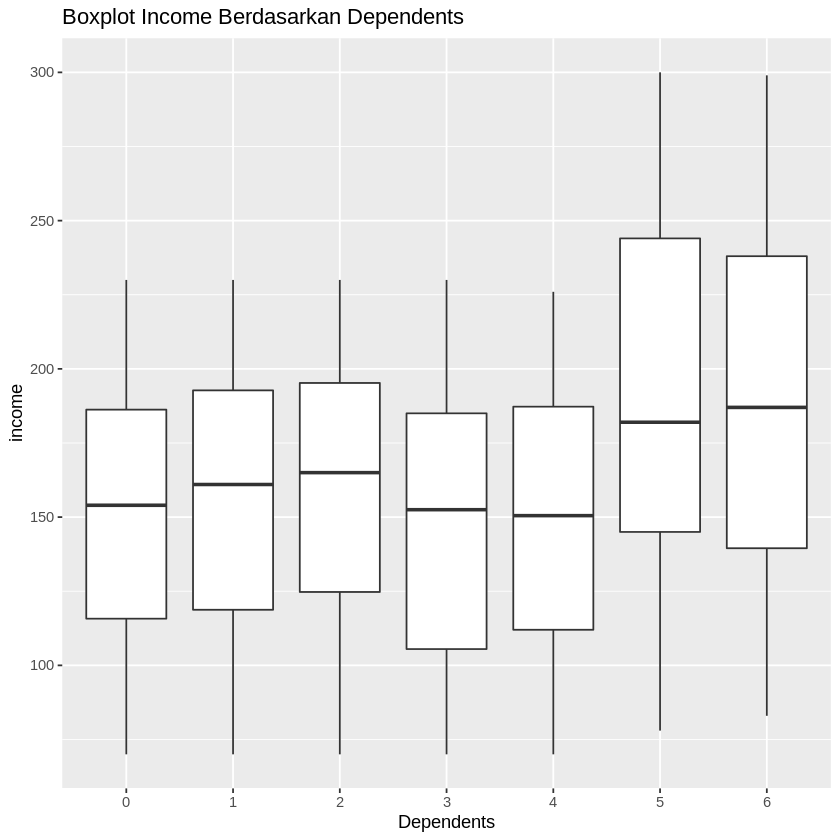

,income,tenor,dependents,midoverdue,age,empyear,asset,debt
income,1.00000000,-0.07256604,0.2427909,0.12756439,0.98345799,0.97526554,0.86275940,0.16255937
tenor,-0.07256604,1.00000000,0.0334339,0.23170789,-0.07433539,-0.07152033,-0.07265391,0.08842241
dependents,0.24279088,0.03343390,1.0000000,0.76422579,0.23110488,0.24992178,0.19010482,0.69529606
midoverdue,0.12756439,0.23170789,0.7642258,1.00000000,0.12134786,0.13267309,0.09832691,0.70521333
age,0.98345799,-0.07433539,0.2311049,0.12134786,1.00000000,0.92632487,0.93780421,0.15994524
empyear,0.97526554,-0.07152033,0.2499218,0.13267309,0.92632487,1.00000000,0.74882989,0.16008510
asset,0.86275940,-0.07265391,0.1901048,0.09832691,0.93780421,0.74882989,1.00000000,0.13959529
debt,0.16255937,0.08842241,0.6952961,0.70521333,0.15994524,0.16008510,0.13959529,1.00000000


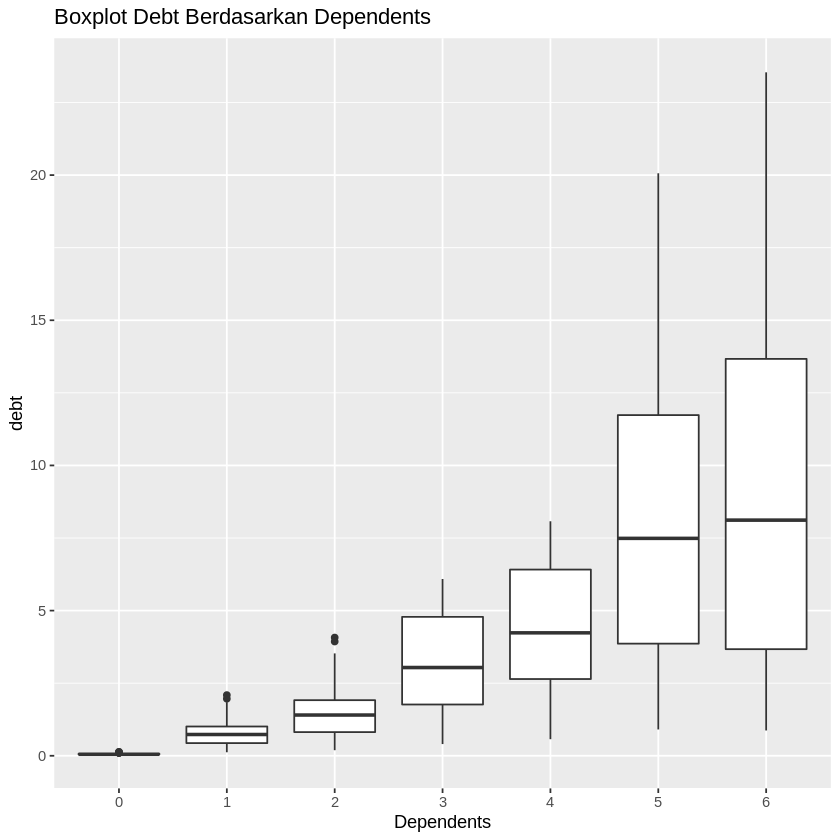

Standard deviations (1, .., p=8):
[1] 1.9886275 1.5061223 0.9869479 0.5697568 0.5168331 0.4513118 0.0807862
[8] 0.0306914

Rotation (n x k) = (8 x 8):
                   PC1        PC2         PC3         PC4         PC5
income     -0.48037618  0.1732370 -0.04956696  0.05692772 -0.21996290
tenor       0.02300648 -0.1921475 -0.96534791 -0.02622698 -0.04016120
dependents -0.23802064 -0.5058409  0.19514188  0.46401430  0.04509053
midoverdue -0.18278120 -0.5638239 -0.03401568  0.29673063  0.22083181
age        -0.48194139  0.1807062 -0.05221971 -0.04070810  0.10019847
empyear    -0.46111279  0.1571628 -0.04049775  0.17088762 -0.57056947
asset      -0.44138937  0.1785155 -0.05058642 -0.22043915  0.71311191
debt       -0.19730574 -0.5196857  0.13958206 -0.78310912 -0.23470343
                    PC6          PC7           PC8
income      0.053169773  0.560979083  6.063182e-01
tenor      -0.168350384 -0.003290186 -9.006944e-05
dependents -0.657287184  0.004360366 -1.701761e-03
midoverdue  0.7

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     1.9886 1.5061 0.9869 0.56976 0.51683 0.45131 0.08079
Proportion of Variance 0.4943 0.2836 0.1218 0.04058 0.03339 0.02546 0.00082
Cumulative Proportion  0.4943 0.7779 0.8996 0.94022 0.97361 0.99907 0.99988
                           PC8
Standard deviation     0.03069
Proportion of Variance 0.00012
Cumulative Proportion  1.00000

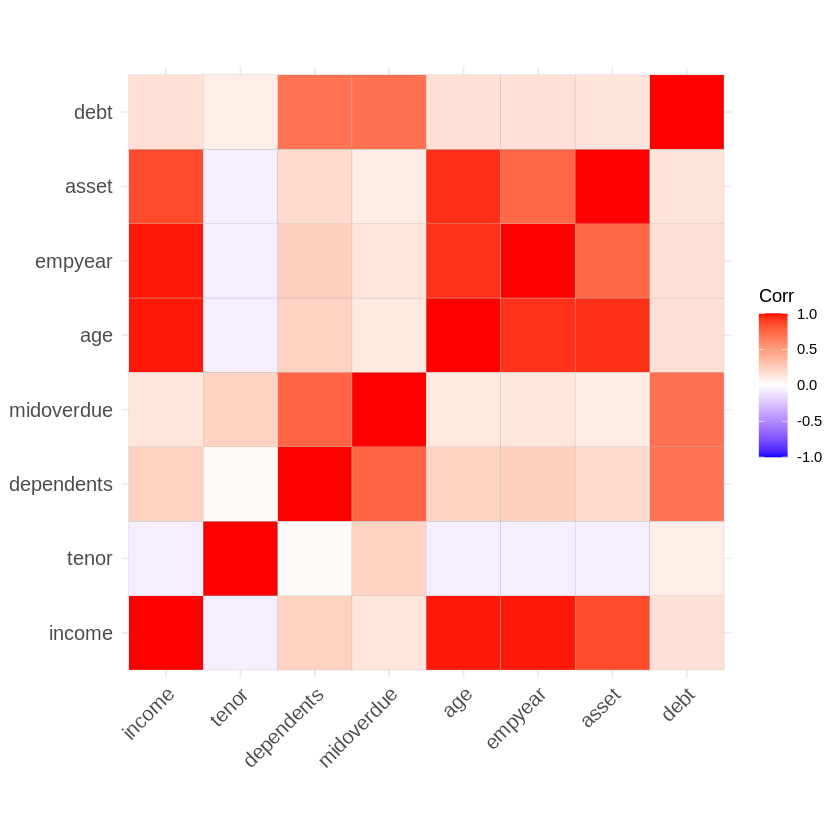

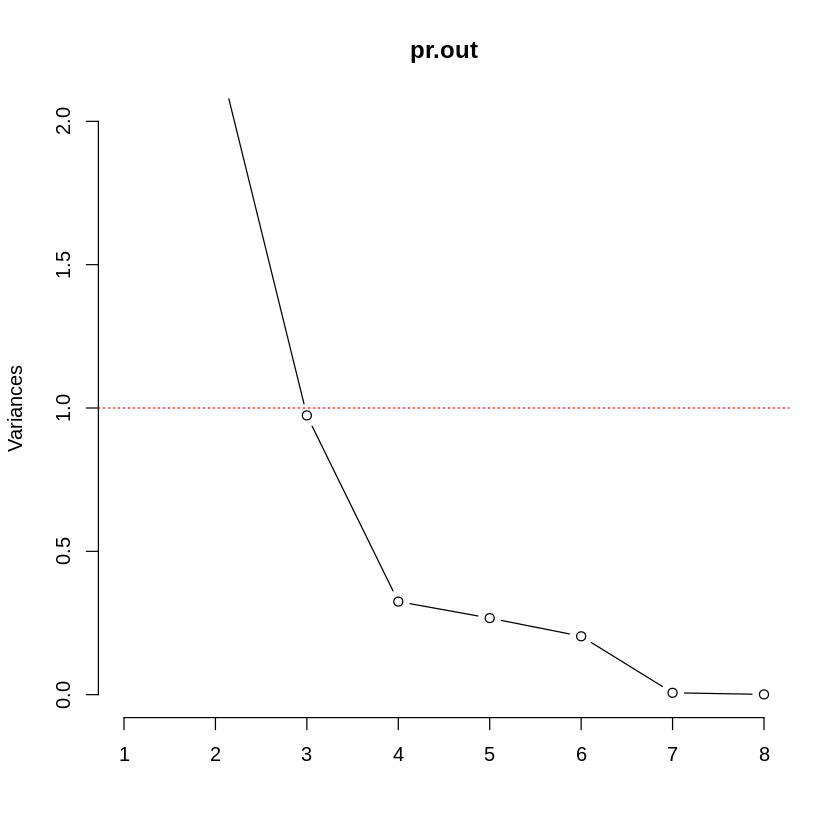

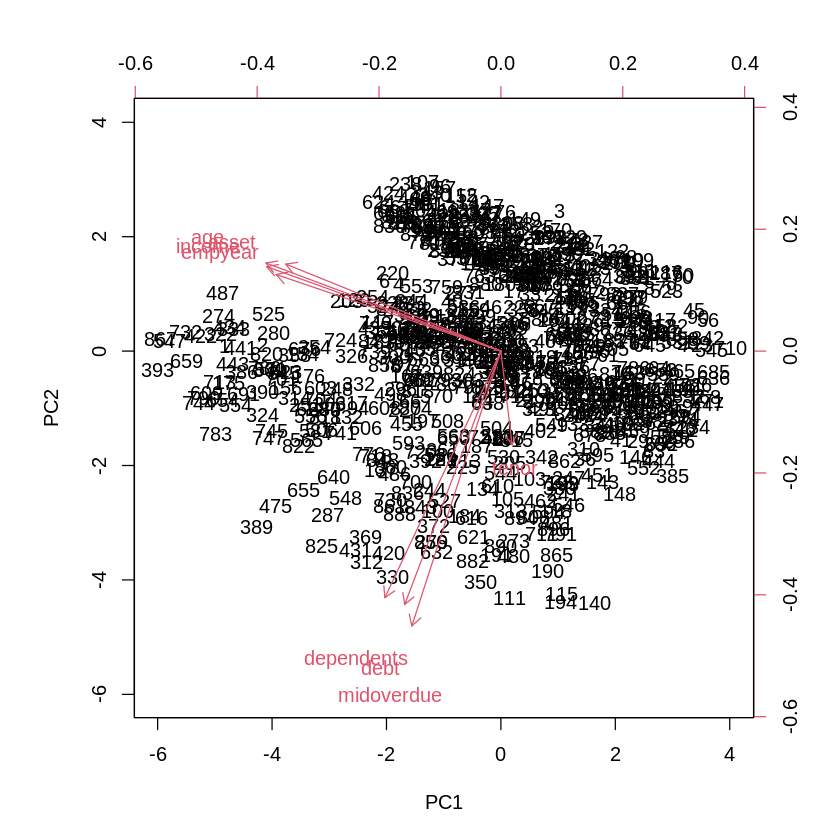

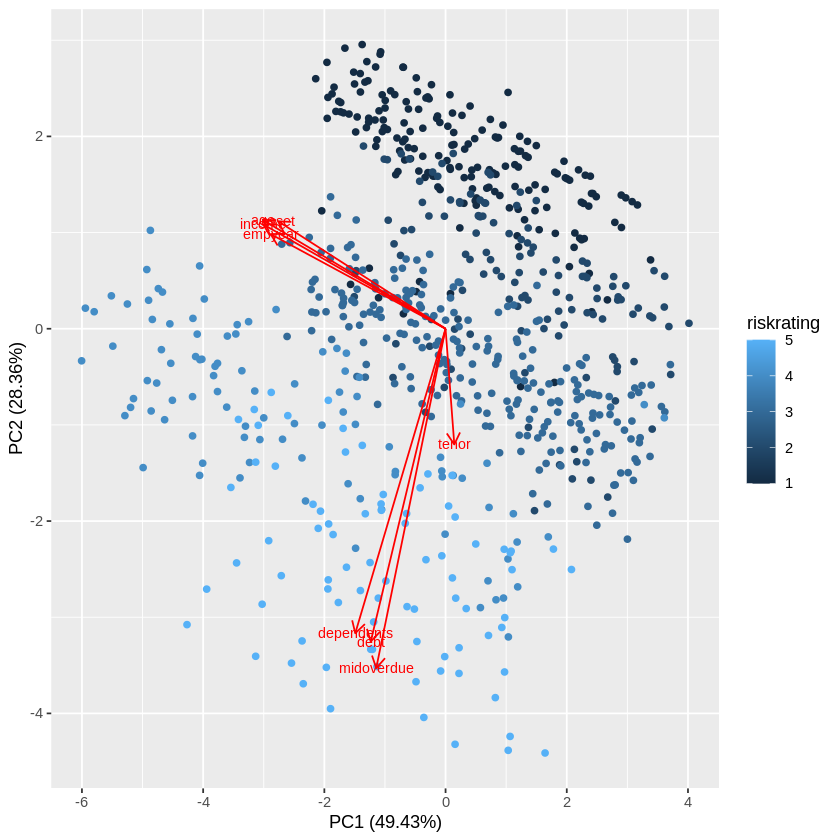

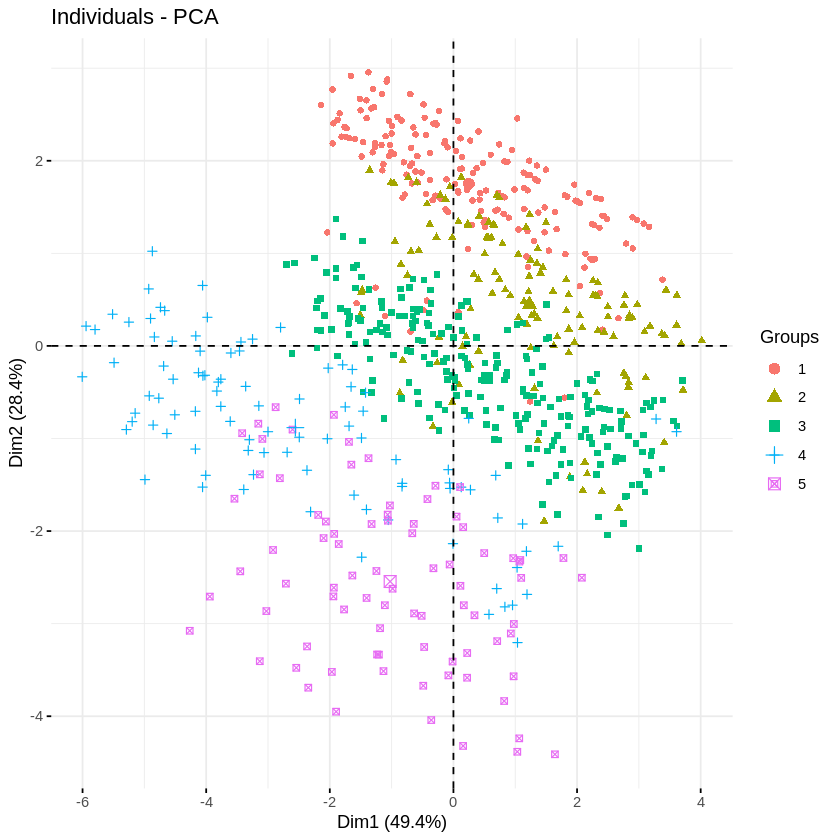

In [19]:
#Baca data pada sheet "cslarge" dalam file "https://storage.googleapis.com/dqlab-dataset/dqlab_pcadata.xlsx"
#dan simpan data dengan nama "cslarge_raw"
cslarge_raw <- read.xlsx("https://storage.googleapis.com/dqlab-dataset/dqlab_pcadata.xlsx", sheet = "cslarge")

#Tampilkan struktur data 
str(cslarge_raw)

#Tampilkan beberapa baris observasi dengan fungsi head()
head(cslarge_raw)

#Tampilkan statistika deskriptif untuk semua variabel dalam data frame.
summary(cslarge_raw)

#Gambarkan distribusi income berdasarkan dependents.
library(ggplot2) # library untuk fungsi ggplot
ggplot(cslarge_raw, aes(as.factor(dependents), income)) + 
   geom_boxplot() + xlab("Dependents") + ggtitle("Boxplot Income Berdasarkan Dependents")

#Gambarkan distribusi debt berdasarkan dependents seperti pada
#contoh boxplot income di atas.
ggplot(cslarge_raw, aes(as.factor(dependents), debt)) + 
   geom_boxplot() + xlab("Dependents") + ggtitle("Boxplot Debt Berdasarkan Dependents")

#Pisahkan data untuk traning set dan testing set 
#untuk tiap-tiap risk rating
#[5]

#Catat indeks/ nomor baris untuk tiap-tiap risk rating
index1 <- which(cslarge_raw$riskrating == 1)
index2 <- which(cslarge_raw$riskrating == 2)
index3 <- which(cslarge_raw$riskrating == 3)
index4 <- which(cslarge_raw$riskrating == 4)
index5 <- which(cslarge_raw$riskrating == 5)

#Lakukan pencatatan indeks untuk risk rating berikutnya

#80% data akan digunakan sebagai traning set.
#Ulangi langkah sampai dengan index5
ntrain1 <- round(0.8 * length(index1))
ntrain2 <- round(0.8 * length(index2))
ntrain3 <- round(0.8 * length(index3))
ntrain4 <- round(0.8 * length(index4))
ntrain5 <- round(0.8 * length(index5))

#set seed agar sampling ini bisa direproduksi
set.seed(100)

#sampling data masing-masing rating untuk training set
train1_index <- sample(index1, ntrain1)
train2_index <- sample(index2, ntrain2)
#Ulangi langkah sampai dengan train5_index
train3_index <- sample(index3, ntrain3)
train4_index <- sample(index4, ntrain4)
train5_index <- sample(index5, ntrain5)

#menyimpan data ke dalam testing set
test1_index <- setdiff(index1, train1_index)
test2_index <- setdiff(index2, train2_index)
#Ulangi langkah sampai dengan test5_index
test3_index <- setdiff(index3, train3_index)
test4_index <- setdiff(index4, train4_index)
test5_index <- setdiff(index5, train5_index)

#Menggabungkan hasil sampling masing-masing risk rating ke dalam training set
cslarge_train <- do.call("rbind", list(cslarge_raw[train1_index,],
   cslarge_raw[train2_index,], cslarge_raw[train3_index,],
   cslarge_raw[train4_index,], cslarge_raw[train5_index,]))
cstrain <- subset(cslarge_train, select = -c(contractcode,riskrating))

#Menggabungkan hasil sampling masing-masing risk rating ke dalam testing set
cslarge_test <- do.call("rbind", list(cslarge_raw[test1_index,],
   cslarge_raw[test2_index,], cslarge_raw[test3_index,],
   cslarge_raw[test4_index,], cslarge_raw[test5_index,]))
cstest <- subset(cslarge_test, select = -c(contractcode,riskrating))

#Menghitung korelasi antar variabel dalam data frame
cor(cstrain)
#Menggambarkan matrik korelasi dengan ggcorrplot
library(ggcorrplot)
ggcorrplot(cor(cstrain))

#Lakukan analisa PCA dengan fungsi prcomp() dan
#simpan output ke dalam obyek dengan nama pr.out
pr.out <- prcomp(cstrain, scale = TRUE, center = TRUE)

#Tampilkan output PCA dengan memanggil obyek pr.out
pr.out

#Tampilkan summary dari output PCA
summary(pr.out)

#Gambarkan Screeplot dengan menggunakan fungsi screeplot()
screeplot(pr.out, type = "line", ylim = c(0,2))

#Tambahkan garis horizontal sebagai panduan untuk menggunakan kriteria Kaiser
abline(h = 1, lty = 3, col = "red")

#Gambarkan biplot dengan menggunakan fungsi biplot()
biplot(pr.out, scale = 0)

#Gambarkan Principal Component dan risk rating dengan menggunakan
#fungsi autoplot() dari package ggfortify.
library(ggfortify)
autoplot(pr.out, data = cslarge_train, colour = 'riskrating', 
   loadings = TRUE, loadings.label = TRUE, 
   loadings.label.size = 3, scale = 0)

#Gambarkan Principal Component dan risk rating dengan menggunakan
#fungsi fviz_pca_ind() package factoextra.

library(factoextra)
fviz_pca_ind(pr.out, label="none", habillage=cslarge_train$riskrating)

## Teori Penunjang (Aljabar Linier)

#### [Contoh](https://academy.dqlab.id/main/livecode/89/179/874?pr=0)

In [20]:
(A <- as.matrix(data.frame(c(1,0,1),c(0,1,1),c(1,1,0))))
e <- eigen(A)
str(e)
e

c.1..0..1.,c.0..1..1.,c.1..1..0.
1,0,1
0,1,1
1,1,0


List of 2
 $ values : num [1:3] 2 1 -1
 $ vectors: num [1:3, 1:3] -0.577 -0.577 -0.577 0.707 -0.707 ...
 - attr(*, "class")= chr "eigen"


eigen() decomposition
$values
[1]  2  1 -1

$vectors
           [,1]          [,2]       [,3]
[1,] -0.5773503  7.071068e-01  0.4082483
[2,] -0.5773503 -7.071068e-01  0.4082483
[3,] -0.5773503  4.440892e-16 -0.8164966


#### [Tugas Praktik](https://academy.dqlab.id/main/livecode/89/179/875?pr=0)

In [21]:
# Ketik perintah berikut ini untuk membaca help tentang matriks
?matrix

# Buatlah matriks 3 x 3 dan simpan dengan nama matriks A.
A <- matrix(c(1,1,0,0,-2,1,0,0,3), nrow = 3, ncol = 3, byrow = TRUE)

# Tuliskan perintah untuk menampilkan matriks A
A

# Tuliskan perintah R untuk menghitung nilai eigen dan vektor eigen
# dan simpanlah hasilnya dalam variable ev
ev <- eigen(A)

# Tuliskan perintah untuk melihat struktur obyek eigen
str(ev)

# Tuliskan perintah untuk melihat hasil output
ev

# Tuliskan perintah untuk mengakses nilai eigen
ev$values

# Tuliskan perintah untuk mengakses vektor eigen
ev$vectors

1,1,0
0,-2,1
0,0,3


List of 2
 $ values : num [1:3] 3 -2 1
 $ vectors: num [1:3, 1:3] 0.0976 0.1952 0.9759 -0.3162 0.9487 ...
 - attr(*, "class")= chr "eigen"


eigen() decomposition
$values
[1]  3 -2  1

$vectors
           [,1]       [,2] [,3]
[1,] 0.09759001 -0.3162278    1
[2,] 0.19518001  0.9486833    0
[3,] 0.97590007  0.0000000    0


[1]  3 -2  1

0.09759001,-0.3162278,1
0.19518001,0.9486833,0
0.97590007,0.0000000,0


#### Keterbatasan PCA

Dalam praktek *Principal Component* diberi nama tersendiri berdasarkan ringkasan variabel-variabel yang dominan. Hal ini memerlukan pengetahuan domain dan ada kalanya variabel-variabel yang muncul kurang sesuai dengan teori pada domain.

Cara kerja PCA dalam mereduksi dimensi adalah membentuk *Principal Component* yang memberikan variabilitas data terbesar. Keterbatasan PCA adalah proses pemilihan PC hanya dilakukan dengan variabel-variabel prediktor. Oleh karena itu PCA sebaiknya bukan digunakan sebagai model namun digunakan sebagai teknik *preprocessing* data untuk kemudian menjadi input metode lain. Alternatif lain adalah menggunakan metode **Partial Least Squares** yang melibatkan variabel respons dalam reduksi dimensi.